In [ ]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np

In [ ]:
tau = 26.0             # lifetime of charged pion (ns)
dt = 1.0               # size of time interval (ns)
tmax = 100             # time range (ns)
prob = dt/tau          # decay probability in interval dt

In [ ]:
time = np.arange(0.0,tmax,dt,dtype=int)

Npdata = np.zeros(tmax,dtype=float)
Nmdata = np.zeros(tmax,dtype=float)
Ndata = np.zeros(tmax,dtype=float)

dNpdata = np.zeros(tmax,dtype=float)
dNmdata = np.zeros(tmax,dtype=float)
dNdata = np.zeros(tmax,dtype=float)

In [ ]:
Npi = 10000             # pion number
Nmu = 0                # muon number
for it in range(tmax): # loop over time steps
    Ndecay = 0
    for ip in range(Npi): # loop over surviving pions
        if np.random.ranf() < prob:
            Ndecay += 1
    for ip in range(Nmu): # loop over surviving pions
        if np.random.ranf() < prob:
            Ndecay += 1


    Npi -= Ndecay
    Nmu += Ndecay

    Npdata[it] = Npi
    Nmdata[it] = Nmu
    Ndata[it] = Ndecay
    dNpdata[it] = np.sqrt(Npi)
    dNmdata[it] = np.sqrt(Nmu)
    dNdata[it] = np.sqrt(Ndecay)

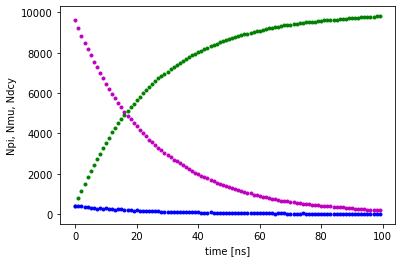

In [ ]:
plt.plot(time,Npdata,"m.")
plt.plot(time,Nmdata,"g.")
plt.plot(time,Ndata,"b.")
plt.xlabel("time [ns]")
plt.ylabel("Npi, Nmu, Ndcy")
plt.savefig('Npi Nmu, Ndcy versus time.png')

In [ ]:
# set fit range
tmin = 20
tmax = 80

tau_pi 25.00 +/-  0.63


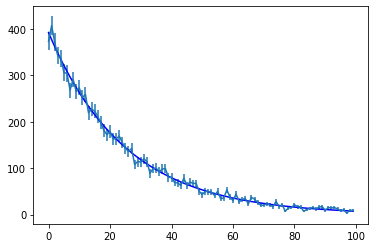

In [ ]:
def fdy(t, p1, p2):
    return p1*np.exp(-t/p2)
pars, covs = fit.curve_fit(fdy, time[tmin:tmax], Ndata[tmin:tmax], p0=[Npi,25.])
Nfit1 = fdy(time, pars[0], pars[1])
plt.errorbar(time,Ndata,yerr=dNdata)
plt.plot(time,Nfit1,"b-")
print( "tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
plt.savefig('fit with equal error.png')

tau_pi 24.32 +/-  0.71


array([[373.4447877 , -12.71511284],
       [-12.71511284,   0.50000375]])

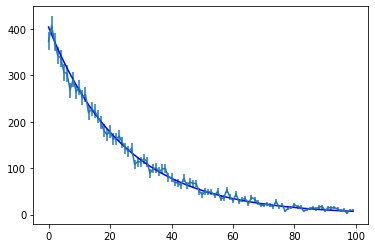

In [ ]:
pars, covs = fit.curve_fit(fdy, time[tmin:tmax], Ndata[tmin:tmax], sigma = dNdata[tmin:tmax]+1., p0=[Npi,25.], absolute_sigma=True)
Nfit2 = fdy(time, pars[0], pars[1]) # fixed zero sigma's by +1
plt.errorbar(time,Ndata,yerr=dNdata)
plt.plot(time,Nfit2,"b-")
print( "tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
plt.savefig('fit with sqrtN errors.png')
covs

In [ ]:
dNfit = np.sqrt(Nfit2)
pars, covs = fit.curve_fit(fdy, time[tmin:tmax], Ndata[tmin:tmax], sigma = dNfit[tmin:tmax], p0=[Npi,25.], absolute_sigma=True)
Nfit3 = fdy(time, pars[0], pars[1])
plt.errorbar(time,Ndata,yerr=dNfit)
plt.plot(time,Nfit3,"b-")
print( "tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
plt.savefig('fit with sqrtf errors.png')

In [ ]:
dNfit = np.sqrt(Nfit3)
pars, covs = fit.curve_fit(fdy, time[tmin:tmax], Ndata[tmin:tmax], sigma = dNfit[tmin:tmax], p0=[Npi,25.], absolute_sigma=True)
Nfit4 = fdy(time, pars[0], pars[1])
plt.errorbar(time,Ndata,yerr=dNfit)
plt.plot(time,Nfit4,"b-")
print( "tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
plt.savefig('fit with iterated sqrtf errors.png')

In [ ]:
plt.plot(time,Nfit4-Nfit1,"b-")
plt.plot(time,Nfit4-Nfit2,"m-")
plt.plot(time,Nfit4-Nfit3,"g-")